Import packages

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from joblib import dump
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Read data

In [69]:
data = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/clean.csv")
data = data[['price', 'zip_code', 'living_space', 'rooms', 'type']]
plz  = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/plz_data.csv") 

Convert types into dummies

In [70]:
type_columns = "type_" + data["type"].unique()
data = pd.get_dummies(data, columns=["type"])


Merge our cols with plz data

In [71]:
data = data.merge(plz, how = 'inner', left_on = "zip_code", right_on = "PLZ")
data = data.drop(columns = ["PLZ", "zip_code"])

print(len(data))
data

13068


,price,living_space,rooms,type_attic-flat,type_attic-room,type_castle,type_chalet,type_detached-house,type_detached-secondary-suite,type_duplex-maisonette,...,PLZ_Group_9000,PLZ_Group_9100,PLZ_Group_9200,PLZ_Group_9300,PLZ_Group_9400,PLZ_Group_9500,PLZ_Group_9600,PLZ_Group_9700,PLZ_Group_9800,PLZ_Group_9900
0,1150000.0,100.0,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1420000.0,156.0,4.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1430000.0,154.0,4.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,550000.0,124.0,4.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720000.0,93.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13063,895000.0,130.0,4.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13064,1090000.0,147.0,5.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13065,2750000.0,385.0,7.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13066,1415000.0,150.0,6.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


See amount of na's

In [72]:
data.isna().sum().sort_values(ascending = False)

price                                1011
living_space                          692
rooms                                 582
PLZ_Group_9800                          0
PLZ_Group_4100                          0
                                     ... 
NoisePollutionRailwayL                  0
gde_politics_fdp                        0
gde_social_help_quota                   0
gde_area_nonproductive_percentage       0
PLZ_Group_9900                          0
Length: 162, dtype: int64

Drop NA, since there arent many

In [73]:
data = data.dropna()
len(data)

11263

Select X and y

In [74]:
y_cols = data.columns[0]
X_cols = data.columns[1:]

X = data[X_cols]
y = data[y_cols]

Split train and test data

In [75]:
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

Train model

In [76]:
model = Ridge(alpha = 0.1).fit(X_train.values, y_train.values)

Get score

In [77]:
model.score(X_test, y_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


0.34059116715689663

Plot predicted to real values

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


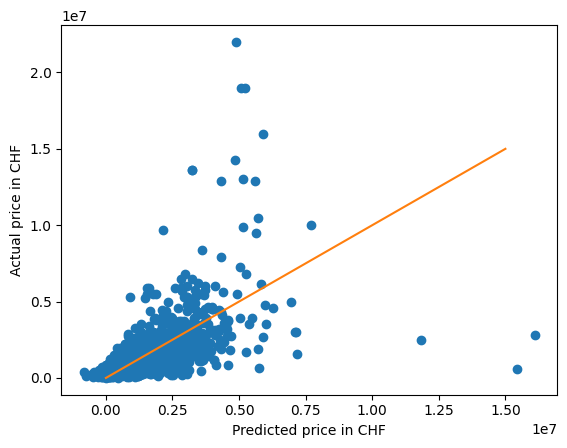

In [89]:
perf = np.linspace(0, 1.5 * 10 ** 7, 2)

plt.plot(model.predict(X_test), y_test, 'o')
plt.xlabel("Predicted price in CHF")
plt.ylabel("Actual price in CHF")
plt.plot(perf, perf)

Make example prediction

In [86]:
pred = pd.DataFrame({"zip_code": [8050], "living_space": [90], "rooms": [4.5], "type": ["flat"]})

if ("type_" + pred.iloc[0]["type"] not in type_columns):
    raise Exception("ALARM")

pred[type_columns] = 0
pred["type_" + pred["type"]] = 1

pred = pred.merge(plz, how = 'inner', left_on = "zip_code", right_on = "PLZ")
print(str(np.round(model.predict(pred[X_cols])[0], 2)) + " CHF")

1186022.98 CHF


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Dump model to file

In [80]:
dump(model, 'simple_model.joblib')

['simple_model.joblib']